In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def l2_logistic_regression(train_data, test_data, train_labels, test_labels):
    
    # Train model
    model = LogisticRegression(penalty='l2', random_state=42)
    model.fit(train_data, train_labels)    
    
    # Extract top features from model
    importances = model.coef_
    
    for i in range(len(importances)):
        indices = np.argsort(importances[i])[::-1]

        print('\nFeature ranking for label ' + str(i) + ':') if len(importances) > 1 else print('Feature ranking:')
        for f in range(30):
            print('%d. Feature %d (%f)' % (f + 1, indices[f], importances[i][indices[f]]))

    # Test model
    y_train_pred = model.predict(train_data)
    y_test_pred = model.predict(test_data)

    # Evaluate model
    print('\nLogistic Regression - \nTrain Accuracy: ', round(np.sum(y_train_pred == train_labels) / train_data.shape[0], 4))
    print('Test Accuracy: ', round(np.sum(y_test_pred == test_labels) / test_data.shape[0], 4))

In [3]:
def decision_tree_classifier(train_data, test_data, train_labels, test_labels):

    # Train model
    for model in [
        DecisionTreeClassifier(random_state=42), 
        DecisionTreeClassifier(random_state=42, max_depth=10), 
        DecisionTreeClassifier(random_state=42, min_samples_leaf=2), 
        DecisionTreeClassifier(random_state=42, min_samples_split=3)
    ]:
        
        model.fit(train_data, train_labels)

        # Extract top features from model
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        print('Feature ranking:')
        for f in range(30):
            print('%d. Feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

        # Test model
        y_train_pred = model.predict(train_data)
        y_test_pred = model.predict(test_data)

        # Evaluate model
        print('\nDecision Tree - \nTrain Accuracy: ', round(np.sum(y_train_pred == train_labels) / train_data.shape[0], 4))
        print('Test Accuracy: ', round(np.sum(y_test_pred == test_labels) / test_data.shape[0], 4))
        print('-------------------------------------------')

In [4]:
# Fetch data
mnist_dataset = fetch_mldata('MNIST original')
mnist_data = mnist_dataset.data
mnist_labels = mnist_dataset.target

In [5]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_labels, test_size=0.20, random_state=42)

In [6]:
# Logistic Regression

train_data = X_train
test_data = X_test
train_labels = y_train
test_labels = y_test

# Train model
model = LogisticRegression(penalty='l2', random_state=42)
model.fit(train_data, train_labels)    

importances = model.coef_   # Extract top features from model

images = []   
for i in range(len(importances)):
    indices = np.argsort(importances[i])[::-1]

    # Get top k features for every label
    features = []
    print('\nFeature ranking for label ' + str(i) + ':') if len(importances) > 1 else print('Feature ranking:')
    for f in range(30):
        features.append(indices[f])
        print('%d. Feature %d (%f)' % (f + 1, indices[f], importances[i][indices[f]]))
     
    # Transform indices of features into row-col values for numpy ndarray
    row = []
    col = []
    for feature in features:
        row.append(int(feature/28))
        col.append(feature%28)
      
    # Store numpy ndarray of features into list of images
    new_image = np.zeros((28,28))
    for j in range(len(features)):
        new_image[row[j]][col[j]] = 255       
    images.append(new_image)

# Test model
y_train_pred = model.predict(train_data)
y_test_pred = model.predict(test_data)

# Evaluate model
print('\nLogistic Regression - \nTrain Accuracy: ', round(np.sum(y_train_pred == train_labels) / train_data.shape[0], 4))
print('Test Accuracy: ', round(np.sum(y_test_pred == test_labels) / test_data.shape[0], 4))


Feature ranking for label 0:
1. Feature 224 (0.136287)
2. Feature 503 (0.105213)
3. Feature 45 (0.104530)
4. Feature 614 (0.098927)
5. Feature 282 (0.080302)
6. Feature 40 (0.076656)
7. Feature 63 (0.066875)
8. Feature 89 (0.066872)
9. Feature 39 (0.062755)
10. Feature 43 (0.056666)
11. Feature 109 (0.039545)
12. Feature 641 (0.037424)
13. Feature 676 (0.029912)
14. Feature 87 (0.029849)
15. Feature 669 (0.029660)
16. Feature 223 (0.024536)
17. Feature 227 (0.024193)
18. Feature 311 (0.023364)
19. Feature 69 (0.021711)
20. Feature 226 (0.019215)
21. Feature 143 (0.018542)
22. Feature 334 (0.018185)
23. Feature 717 (0.017400)
24. Feature 118 (0.017177)
25. Feature 165 (0.015654)
26. Feature 59 (0.013929)
27. Feature 360 (0.013535)
28. Feature 586 (0.013070)
29. Feature 257 (0.012329)
30. Feature 200 (0.012089)

Feature ranking for label 1:
1. Feature 641 (0.124600)
2. Feature 307 (0.101468)
3. Feature 359 (0.097323)
4. Feature 670 (0.091831)
5. Feature 312 (0.085422)
6. Feature 256 (0.


Logistic Regression - 
Train Accuracy:  0.9327
Test Accuracy:  0.9179



Label 0:


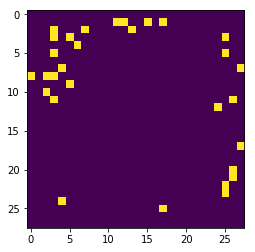


Label 1:


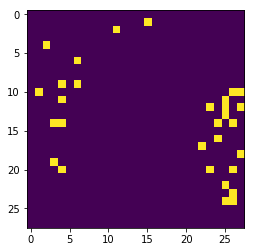


Label 2:


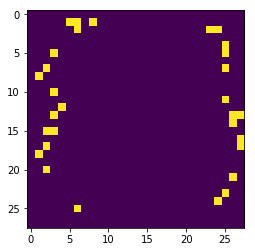


Label 3:


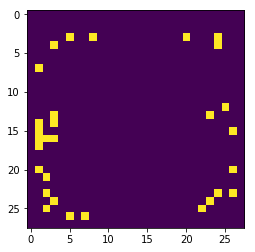


Label 4:


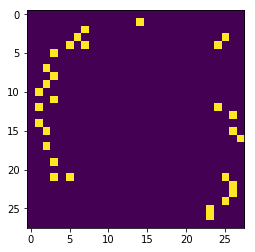


Label 5:


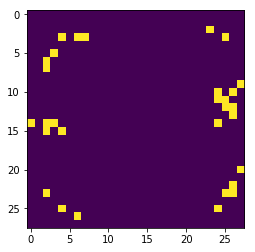


Label 6:


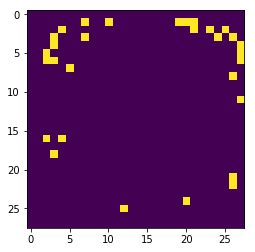


Label 7:


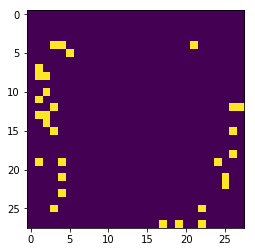


Label 8:


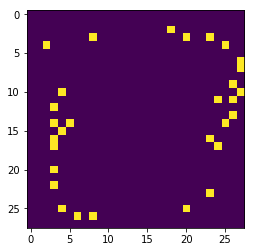


Label 9:


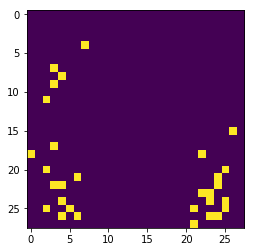

In [7]:
# Print features
for i in range(len(images)):
    print('\nLabel ' + str(i) + ':')
    plt.imshow(images[i])
    plt.show()

In [8]:
# Decision Tree

train_data = X_train
test_data = X_test
train_labels = y_train
test_labels = y_test

images = []

# Train model
model = DecisionTreeClassifier(random_state=42)
for model in [
    DecisionTreeClassifier(random_state=42), 
    DecisionTreeClassifier(random_state=42, max_depth=10), 
    DecisionTreeClassifier(random_state=42, min_samples_leaf=2), 
    DecisionTreeClassifier(random_state=42, min_samples_split=3)
]:

    model.fit(train_data, train_labels)    

    # Extract top features from model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Get top k features
    print('\nFeature ranking:')
    for f in range(30):
        print('%d. Feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

    # Transform indices of features into row-col values for numpy ndarray
    row = []
    col = []
    for feature in features:
        row.append(int(feature/28))
        col.append(feature%28)

    # Store numpy ndarray of features into list of images
    new_image = np.zeros((28,28))
    for j in range(len(features)):
        new_image[row[j]][col[j]] = 255
    images.append(new_image)

    # Test model
    y_train_pred = model.predict(train_data)
    y_test_pred = model.predict(test_data)

    # Evaluate model
    print('\nDecision Tree - \nTrain Accuracy: ', round(np.sum(y_train_pred == train_labels) / train_data.shape[0], 4))
    print('Test Accuracy: ', round(np.sum(y_test_pred == test_labels) / test_data.shape[0], 4))


Feature ranking:
1. Feature 489 (0.054079)
2. Feature 350 (0.045175)
3. Feature 435 (0.044980)
4. Feature 542 (0.039893)
5. Feature 211 (0.035058)
6. Feature 432 (0.033236)
7. Feature 270 (0.030666)
8. Feature 347 (0.029399)
9. Feature 597 (0.027551)
10. Feature 486 (0.026733)
11. Feature 155 (0.026241)
12. Feature 521 (0.023522)
13. Feature 354 (0.019036)
14. Feature 273 (0.015969)
15. Feature 296 (0.015357)
16. Feature 290 (0.015035)
17. Feature 405 (0.012132)
18. Feature 657 (0.011417)
19. Feature 656 (0.010171)
20. Feature 658 (0.008892)
21. Feature 352 (0.008856)
22. Feature 596 (0.008363)
23. Feature 297 (0.008182)
24. Feature 458 (0.007894)
25. Feature 380 (0.007691)
26. Feature 301 (0.006798)
27. Feature 206 (0.006754)
28. Feature 404 (0.006506)
29. Feature 267 (0.006470)
30. Feature 598 (0.006051)

Decision Tree - 
Train Accuracy:  1.0
Test Accuracy:  0.8737

Feature ranking:
1. Feature 489 (0.064754)
2. Feature 350 (0.053364)
3. Feature 435 (0.053166)
4. Feature 542 (0.04723


Model 0:


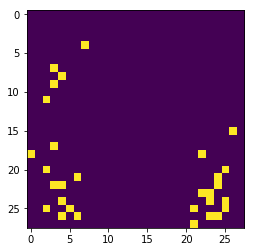


Model 1:


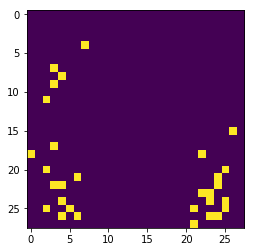


Model 2:


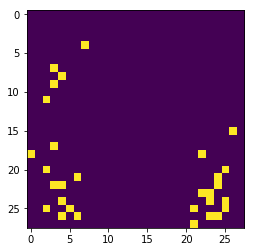


Model 3:


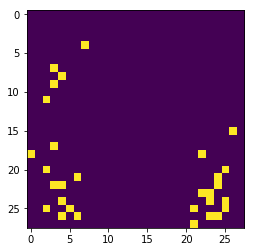

In [9]:
# Print features
for i in range(len(images)):
    print('\nModel ' + str(i) + ':')
    plt.imshow(images[i])
    plt.show()

# With normalizing

In [10]:
# Normalize data
norm_X_train = np.divide(X_train, 255)
norm_X_test = np.divide(X_test, 255)

print(norm_X_train.shape)
print(norm_X_test.shape)

(56000, 784)
(14000, 784)


In [11]:
# Logistic Regression

train_data = norm_X_train
test_data = norm_X_test
train_labels = y_train
test_labels = y_test

# Train model
model = LogisticRegression(penalty='l2', random_state=42)
model.fit(train_data, train_labels)    

importances = model.coef_   # Extract top features from model

images = []   
for i in range(len(importances)):
    indices = np.argsort(importances[i])[::-1]

    # Get top k features for every label
    features = []
    print('\nFeature ranking for label ' + str(i) + ':') if len(importances) > 1 else print('Feature ranking:')
    for f in range(30):
        features.append(indices[f])
        print('%d. Feature %d (%f)' % (f + 1, indices[f], importances[i][indices[f]]))
     
    # Transform indices of features into row-col values for numpy ndarray
    row = []
    col = []
    for feature in features:
        row.append(int(feature/28))
        col.append(feature%28)
      
    # Store numpy ndarray of features into list of images
    new_image = np.zeros((28,28))
    for j in range(len(features)):
        new_image[row[j]][col[j]] = 255       
    images.append(new_image)

# Test model
y_train_pred = model.predict(train_data)
y_test_pred = model.predict(test_data)

# Evaluate model
print('\nLogistic Regression - \nTrain Accuracy: ', round(np.sum(y_train_pred == train_labels) / train_data.shape[0], 4))
print('Test Accuracy: ', round(np.sum(y_test_pred == test_labels) / test_data.shape[0], 4))


Feature ranking for label 0:
1. Feature 370 (1.394298)
2. Feature 360 (1.061827)
3. Feature 240 (1.030077)
4. Feature 629 (0.987393)
5. Feature 302 (0.949120)
6. Feature 298 (0.937117)
7. Feature 271 (0.915193)
8. Feature 599 (0.886705)
9. Feature 386 (0.870052)
10. Feature 397 (0.841767)
11. Feature 181 (0.834608)
12. Feature 44 (0.816965)
13. Feature 399 (0.790582)
14. Feature 443 (0.774148)
15. Feature 453 (0.738666)
16. Feature 459 (0.735327)
17. Feature 571 (0.734635)
18. Feature 339 (0.712098)
19. Feature 213 (0.708584)
20. Feature 412 (0.680513)
21. Feature 207 (0.673358)
22. Feature 430 (0.655356)
23. Feature 498 (0.647473)
24. Feature 455 (0.636013)
25. Feature 150 (0.632082)
26. Feature 374 (0.627477)
27. Feature 405 (0.616978)
28. Feature 482 (0.598433)
29. Feature 427 (0.591389)
30. Feature 544 (0.590691)

Feature ranking for label 1:
1. Feature 621 (2.011338)
2. Feature 350 (1.334534)
3. Feature 69 (0.941744)
4. Feature 295 (0.927329)
5. Feature 634 (0.919349)
6. Feature 


Logistic Regression - 
Train Accuracy:  0.9287
Test Accuracy:  0.9178



Label 0:


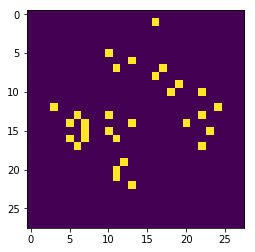


Label 1:


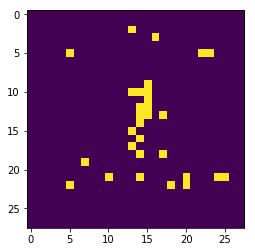


Label 2:


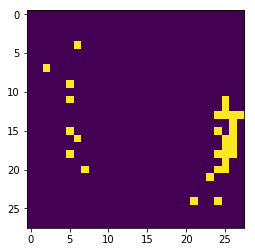


Label 3:


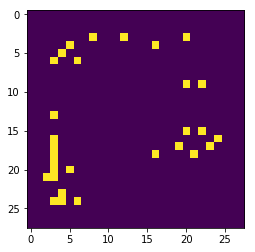


Label 4:


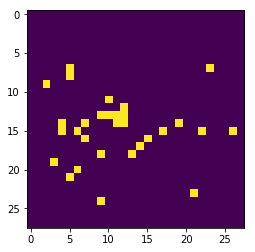


Label 5:


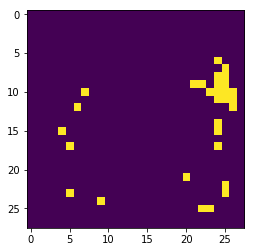


Label 6:


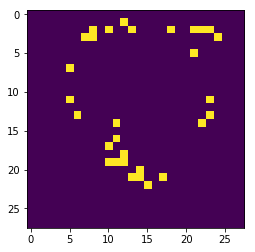


Label 7:


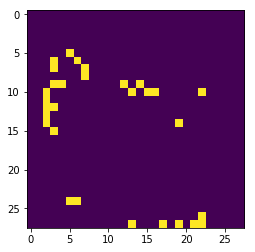


Label 8:


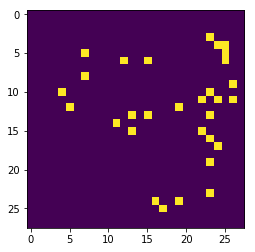


Label 9:


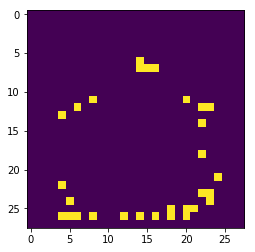

In [12]:
# Print features
for i in range(len(images)):
    print('\nLabel ' + str(i) + ':')
    plt.imshow(images[i])
    plt.show()

In [13]:
# Decision Tree

train_data = norm_X_train
test_data = norm_X_test
train_labels = y_train
test_labels = y_test

images = []

# Train model
model = DecisionTreeClassifier(random_state=42)
for model in [
    DecisionTreeClassifier(random_state=42), 
    DecisionTreeClassifier(random_state=42, max_depth=10), 
    DecisionTreeClassifier(random_state=42, min_samples_leaf=2), 
    DecisionTreeClassifier(random_state=42, min_samples_split=3)
]:

    model.fit(train_data, train_labels)    

    # Extract top features from model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Get top k features
    print('\nFeature ranking:')
    for f in range(30):
        print('%d. Feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

    # Transform indices of features into row-col values for numpy ndarray
    row = []
    col = []
    for feature in features:
        row.append(int(feature/28))
        col.append(feature%28)

    # Store numpy ndarray of features into list of images
    new_image = np.zeros((28,28))
    for j in range(len(features)):
        new_image[row[j]][col[j]] = 255
    images.append(new_image)

    # Test model
    y_train_pred = model.predict(train_data)
    y_test_pred = model.predict(test_data)

    # Evaluate model
    print('\nDecision Tree - \nTrain Accuracy: ', round(np.sum(y_train_pred == train_labels) / train_data.shape[0], 4))
    print('Test Accuracy: ', round(np.sum(y_test_pred == test_labels) / test_data.shape[0], 4))


Feature ranking:
1. Feature 489 (0.054079)
2. Feature 350 (0.045175)
3. Feature 435 (0.044980)
4. Feature 542 (0.039893)
5. Feature 211 (0.035058)
6. Feature 432 (0.033236)
7. Feature 270 (0.030666)
8. Feature 347 (0.029399)
9. Feature 597 (0.027551)
10. Feature 486 (0.026733)
11. Feature 155 (0.026241)
12. Feature 521 (0.023522)
13. Feature 354 (0.019036)
14. Feature 273 (0.015969)
15. Feature 296 (0.015357)
16. Feature 290 (0.015035)
17. Feature 405 (0.012132)
18. Feature 657 (0.011417)
19. Feature 656 (0.010171)
20. Feature 658 (0.008892)
21. Feature 352 (0.008856)
22. Feature 596 (0.008363)
23. Feature 297 (0.008182)
24. Feature 458 (0.007894)
25. Feature 380 (0.007691)
26. Feature 301 (0.006798)
27. Feature 206 (0.006754)
28. Feature 404 (0.006506)
29. Feature 267 (0.006470)
30. Feature 598 (0.006051)

Decision Tree - 
Train Accuracy:  1.0
Test Accuracy:  0.8737

Feature ranking:
1. Feature 489 (0.064754)
2. Feature 350 (0.053364)
3. Feature 435 (0.053166)
4. Feature 542 (0.04723


Model 0:


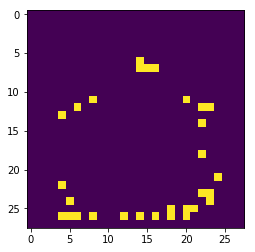


Model 1:


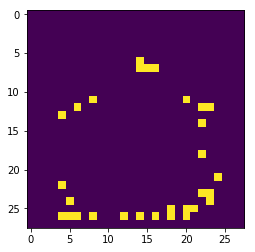


Model 2:


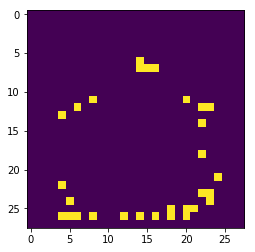


Model 3:


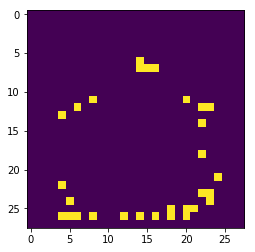

In [14]:
# Print features
for i in range(len(images)):
    print('\nModel ' + str(i) + ':')
    plt.imshow(images[i])
    plt.show()